<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>ML Advanced - Term Project<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Post Data Processing & Feature Selection**](#Section6)<br>
  - **6.1** [**Feature Selection**](#Section61)<br>
  - **6.2** [**Feature Scaling**](#Section62)<br>
  - **6.3** [**Data Preparation**](#Section63)<br>

**7.** [**Model Development & Evaluation**](#Section7)<br>
**8.** [**Conclusion**](#Section8)<br>

<a name = Section1></a>
# **1. Introduction**

<center>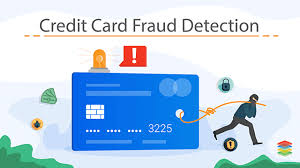</center>


---
<a name = Section2></a>
# **2. Problem Statement**
---


**<h4>Scenario:</h4>**

- This dataset comprises, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset. Let's start!

- We will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud.

#### Our Goals:
- Understand the distribution of the data that was provided to us.
- Understand common mistaked made with imbalanced datasets.
- Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions.
- Determine the Classifiers we are going to use and decide which one has a higher accuracy.
- Create an ensemble classifier and compare the accuracy to our best classifier.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [46]:
!pip install imblearn

  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


<a name = Section32></a>
### **3.2 Importing Libraries**

In [1]:
# Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
import collections

#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
from sklearn.svm import SVC                                         # To perform modeling using SVC
from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier                  # To perform modeling using KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier                     # To perform modeling using StackingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once



# Other Libraries
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

In [2]:
df = pd.read_csv('D:\DS\MLAdvanced_TermProject_EnsembeLearning\creditcard.csv')

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [4]:
df.shape

(284807, 31)

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


**Observation:**

- All fetaures V1 thru V28 are already scaled for the sake of anonymity.

- **75%** of **Amount** have <= $\$$78 while **50%** and **75%** of  Amount records  have  <= $\$$22 and $\$$6.


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observation:**

- We can observer that there is **no null data present**.

- Addtionally, all **features** seems to have **correct data type**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(283726, 31)

#### Observed 589 duplicate rows. We can clearly see the row count reduced to 283726 after removing duplicates.

<a name = Section6></a>

---
# **6. Post Data Processing & Feature Selection**
---

- In this section, we will perform **encoding** over **categorical** features and **feed** the result to the model.

- **Random Forest** will then **identify important features** for our model **using some threshold**.

- This threshold is **used over** the **information gain** which results in **reduction in impurity**.

- And **finally** we will **split** our **data** for the **model development**.

In [12]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [11]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


#### The Fraud class is relatively small. The means imbalanced set.

#### There are no "Null" values, so we don't have to work on ways to replace values.
#### Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (0.17%) of the time in the dataframe.

C:\Users\amarc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

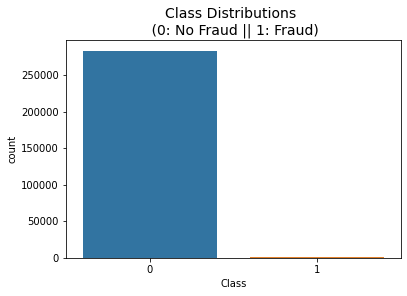

In [14]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

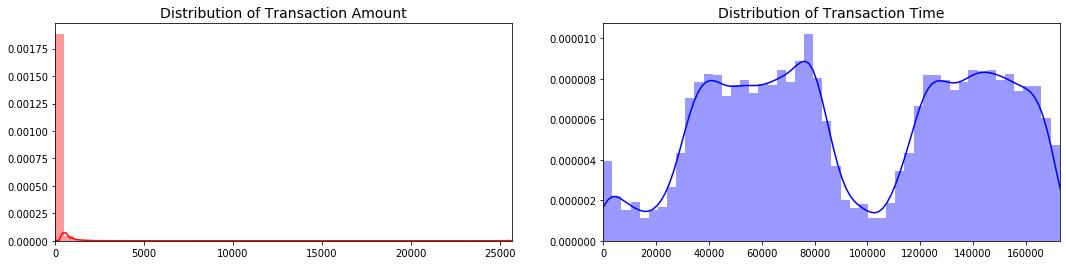

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

<a name = Section61></a>
### **6.1 Feature Selection**

- Now in the real world, it is very rare that all the **features** are **important** while developing the **model**.

- Instead, we analyze the **impact** of **input** feature values over the **target** feature values.

- It is either done by performing **statistical tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- Random forests are one of the most **popular** machine learning **algorithms**.

- The provide a good predictive performance, low overfitting, and easy interpretability.

- This **interpretability** is derived from the importance of each feature on the tree decision evaluated the **reduction in impurity**.

- In other words, it is **easy** to **compute** how much each feature is **contributing** to the decision.

- We will implement **SelectFromModel()** available in Sklearn which uses the base estimator to identify important features.

- The importance of a feature is determined based on **threshold** (a measure to calculate feature importance).

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [13]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 7
Threshold set by Model: 0.03
Important Features: ['V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


**Visualzation of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

C:\Users\amarc\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


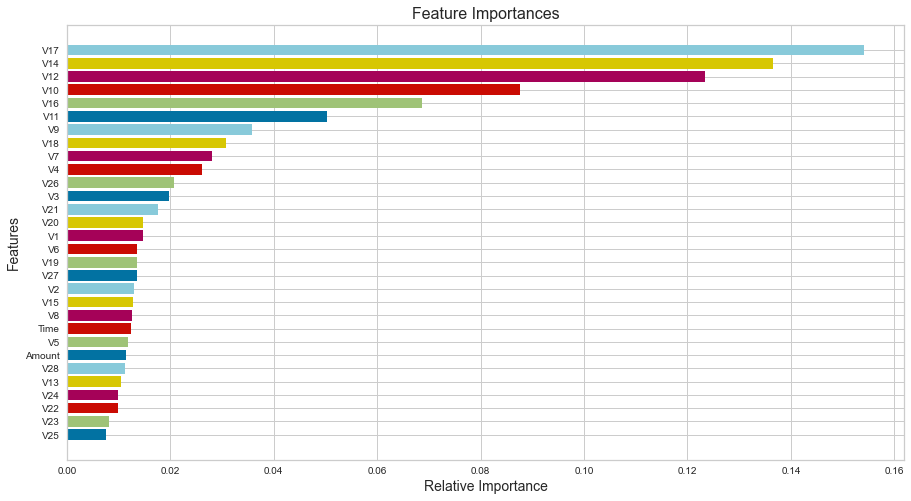

In [18]:
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a name = Section62></a>
### **6.2 Feature Scaling**

In [8]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             283726 non-null  float64
 1   V2             283726 non-null  float64
 2   V3             283726 non-null  float64
 3   V4             283726 non-null  float64
 4   V5             283726 non-null  float64
 5   V6             283726 non-null  float64
 6   V7             283726 non-null  float64
 7   V8             283726 non-null  float64
 8   V9             283726 non-null  float64
 9   V10            283726 non-null  float64
 10  V11            283726 non-null  float64
 11  V12            283726 non-null  float64
 12  V13            283726 non-null  float64
 13  V14            283726 non-null  float64
 14  V15            283726 non-null  float64
 15  V16            283726 non-null  float64
 16  V17            283726 non-null  float64
 17  V18            283726 non-nul

<a name = Section63></a>
### **6.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

### Splitting the Data (Original DataFrame)
#### Before proceeding with the Sampling technique we have to separate the orginal dataframe. We want to test our models on the original testing set not on the testing set created by any sampling techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [10]:
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [10]:
X_train.shape[0]/len(X)

0.7999971803782523

In [11]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 378
Before OverSampling, counts of label '0': 226602 

After OverSampling, the shape of train_X: (453204, 30)
After OverSampling, the shape of train_y: (453204,) 

After OverSampling, counts of label '1': 226602
After OverSampling, counts of label '0': 226602


#### SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.


<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will develop Ensemble classifier with the help of different estimators such as:
  - Logistic Regression
  - K Nearest Neighbor Classifier
  - Random Forest Classifier
  - Gradient Boosting Classifier

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

#### Decision Tree classifier using imbalanced train data

In [22]:
dclf_imb=DecisionTreeClassifier()
dclf_imb.fit(X_train,y_train)
y_pred_imb=dclf_imb.predict(X_test)

print("Accuracy of Decision Tree classifier is {0}".format(accuracy_score(y_test, y_pred_imb)))

Accuracy of Decision Tree classifier is 0.9990307686885419


In [23]:
print(classification_report(y_test, y_pred_imb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.72      0.68      0.70        95

    accuracy                           1.00     56746
   macro avg       0.86      0.84      0.85     56746
weighted avg       1.00      1.00      1.00     56746



#### As the data set is imbalanced, it could not get great Recall score. It clearly shows 0.68 for Class 1.

#### Now, lets try using the [Over sampling] smote data set using the same model

In [33]:
dclf_smt=DecisionTreeClassifier()
dclf_smt.fit(X_train_res,y_train_res)
y_pred_smt=dclf_smt.predict(X_test)

print("Accuracy of Decision Tree classifier is {0}".format(accuracy_score(y_test, y_pred_smt)))

Accuracy of Decision Tree classifier is 0.9977972015648681


In [34]:
print(classification_report(y_test, y_pred_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.41      0.71      0.52        95

    accuracy                           1.00     56746
   macro avg       0.70      0.85      0.76     56746
weighted avg       1.00      1.00      1.00     56746



#### With over sampled Data set, thre is no improvement of recall score. 

#### Let's try an Ensemble technique and observe Recall score

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train_res, y_train_res)
y_pred = bag_clf.predict(X_test)

print("Accuracy of Bagging classifier is {0}".format(accuracy_score(y_test, y_pred)))

Accuracy of Bagging classifier is 0.9791350932224298


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.84      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.91      0.55     56746
weighted avg       1.00      0.98      0.99     56746



#### Recall score jumped from 0.68 to 0.84 with Bagging on Base estimator as Decision Tree. 

#### Now, lets try the smote data set with Logistic Regression.

In [29]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
predict_lr = lr.predict(X_test)

In [30]:
print(classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.88      0.14        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746



#### With over sampled Data set, we see an improvement of 0.2% [compared to imbalanced data set]  in recall and hitting 0.88%

In [15]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier(n_jobs=-1)

# here we are using hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf), ('bg_clf', bag_clf)],
    voting='hard')
voting_clf.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier(n_jobs=-1)),
                             ('bg_clf',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                max_samples=100,
                                                n_estimators=500, n_jobs=-1))])

#### Classification report of Voting Classifier is as below :

In [18]:
pred_vclf=voting_clf.predict(X_test)
print(classification_report(y_test, pred_vclf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.63      0.78      0.69        95

    accuracy                           1.00     56746
   macro avg       0.81      0.89      0.85     56746
weighted avg       1.00      1.00      1.00     56746



#### Recall score improved from 0.68 to 0.78 with Voting Classifier

In [21]:
knn_clf.fit(X_train_res, y_train_res)
pred_knn=knn_clf.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56651
           1       0.01      0.42      0.02        95

    accuracy                           0.94     56746
   macro avg       0.51      0.68      0.50     56746
weighted avg       1.00      0.94      0.97     56746



<a name = Section8></a>

---
# **8. Conclusion**
---

- We **studied** the **characteristics** and **distribution** of data in brief.

- We investigated in-depth the **features** which to **retain** and which to **discard**.

- We performed **model development** by using a ensemble techniques of a variety of algorithms.

- We observed **better results** as we started experimenting with different classifiers.

- This model will **help** the **company** in **saving** lot of **resources** with better recall score of 0.88 where there is less False Positives.


In [35]:
print("Recall score for " + knn_clf.__class__.__name__,  recall_score(y_test, pred_knn))
print("Recall score for " + voting_clf.__class__.__name__,  recall_score(y_test, pred_vclf))
print("Recall score for " + lr.__class__.__name__,  recall_score(y_test, predict_lr))
print("Recall score for " + bag_clf.__class__.__name__,  recall_score(y_test, y_pred))
print("Recall score for " + dclf_smt.__class__.__name__,  recall_score(y_test, y_pred_smt))

Recall score for KNeighborsClassifier 0.42105263157894735
Recall score for VotingClassifier 0.7789473684210526
Recall score for LogisticRegression 0.8842105263157894
Recall score for BaggingClassifier 0.8421052631578947
Recall score for DecisionTreeClassifier 0.7052631578947368
